In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
lw_factors = pd.read_csv("../Resources/Data_Cleaned/lw_factors_clean.csv").dropna(how="any")
df = pd.read_csv("../Resources/Data_Cleaned/master_dataset").dropna(how="any")

#drop duplicate FIPS so they merge
df = df.drop_duplicates(subset=["FIPS"])
lw_factors = lw_factors.drop_duplicates(subset=["FIPS"])

In [30]:
print(len(lw_factors))
print(len(df))

3132
3121


In [31]:
df = df.merge(lw_factors, on="FIPS", how="inner")
print(len(df))

3121


In [32]:
df_clean = df.drop(['pov 1a0c', 'pov 1a1c', 'pov 1a2c','pov 1a3c', 'pov 2a1w0c', 'pov 2a1w1c', 'pov 2a1w2c', 'pov 2a1w3c', 'pov 2a2w0c', 'pov 2a2w1c', 'pov 2a2w2c', 'pov 2a2w3c', 'live 1a0c', 'live 1a1c', 'live 1a2c', 'live 1a3c', 'live 2a1w0c','live 2a2w0c','live 2a2w1c', 'live 2a1w3c', 'live 2a1w2c', 'live 2a2w2c', 'live 2a2w3c', 'min 1a0c','min 1a2c','min 1a3c', 'min 2a1w0c', 'min 2a1w1c', 'min 2a1w2c', 'min 2a1w3c','min 2a2w0c', 'min 2a2w1c', 'min 2a2w2c', 'min 2a2w3c','State_y','County_y'],axis=1).rename(columns={"State_x":"State","County_x":"County"})
cleaning_columns = ['live 2a1w1c', 'min 1a1c']
for i in cleaning_columns:
    df_clean[i] = df_clean[i].str.replace('$','').astype(float)

C:\Users\steve\AppData\Local\Temp/ipykernel_16576/3801125312.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_clean[i] = df_clean[i].str.replace('$','').astype(float)


In [33]:
X = df_clean.drop(["County", "State", "FIPS", "crime_per_10k"],axis=1)
y = df["crime_per_10k"]

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scale everything
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)



In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression

In [36]:
def test_model(model):
    reg = model.fit(X_train_scale, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scale, y_train)}')
    print(f'Test Score: {reg.score(X_test_scale, y_test)}\n')
    print()
    plt.scatter(y_test, model.predict(X_test_scale))
    plt.show()


Model: LinearRegression
Train score: 0.046864281797071694
Test Score: 0.0304682717566519




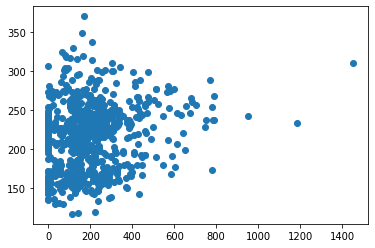

Model: KNeighborsRegressor
Train score: 0.4066572493190649
Test Score: 0.0502861543110098




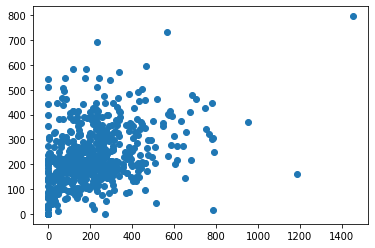

Model: RandomForestRegressor
Train score: 0.8869256468015128
Test Score: 0.27130457475908676




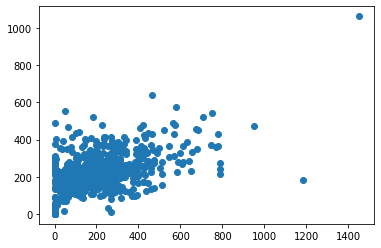

Model: ExtraTreesRegressor
Train score: 1.0
Test Score: 0.22051409586466442




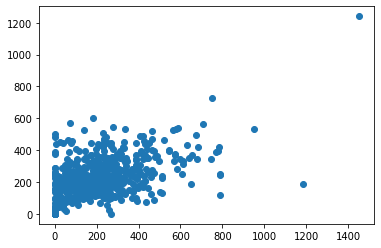

Model: AdaBoostRegressor
Train score: -0.5831468656274024
Test Score: -1.1272058209319558




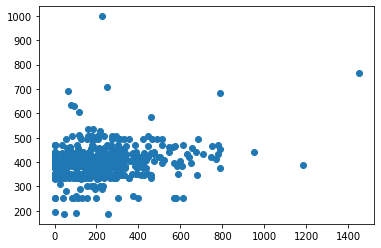

In [37]:
test_model(LinearRegression())
test_model(KNeighborsRegressor())
test_model(RandomForestRegressor())
test_model(ExtraTreesRegressor())
test_model(AdaBoostRegressor())

In [38]:
new_crime_df = pd.read_csv("../Resources/Data_Cleaned/model_crime_data_segmented.csv").dropna(how="any")
print(len(df_clean))
print(len(new_crime_df))
new_master_data = df_clean.merge(new_crime_df, on=["FIPS"], how="inner")
print(len(new_master_data))
new_master_data.columns
new_master_data.to_csv("master_dataset_clean.csv", index=False)

3121
3134
3121


In [39]:
y_vals = ['crime_per_10k_y','violent_crime_per_10k', 'hard_drugs_crime_per_10k','soft_drugs_crime_per_10k', 'commerce_crimes_per_10k']

REGRESSIONS FOR crime_per_10k_y
Model: LinearRegression
Train score: 0.046882135360333366
Test Score: 0.03056128878291775




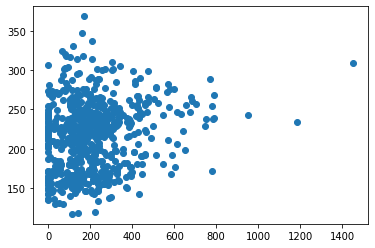

Model: KNeighborsRegressor
Train score: 0.40665652593443624
Test Score: 0.050286111296467984




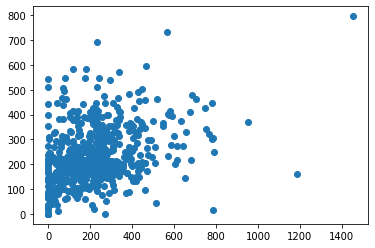

Model: RandomForestRegressor
Train score: 0.8888704361955615
Test Score: 0.26116002275957817




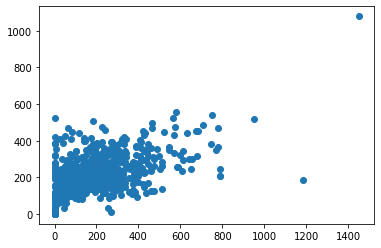

Model: ExtraTreesRegressor
Train score: 1.0
Test Score: 0.21156265536995955




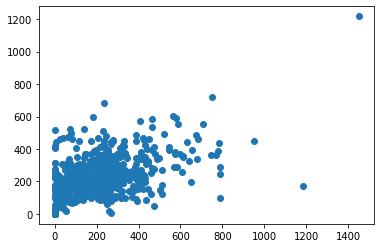

Model: AdaBoostRegressor
Train score: -0.3434239807808206
Test Score: -0.806324694186082




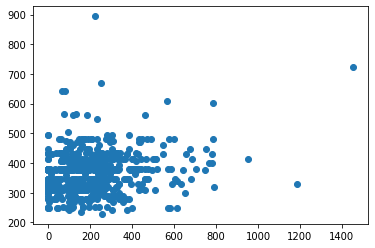

REGRESSIONS FOR violent_crime_per_10k
Model: LinearRegression
Train score: 0.06885476255206335
Test Score: 0.09073730776477784




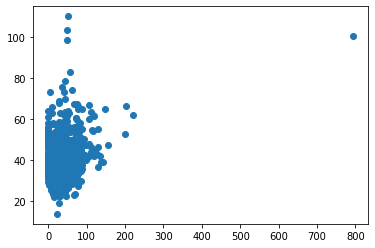

Model: KNeighborsRegressor
Train score: 0.5103430776639537
Test Score: 0.3595905666092549




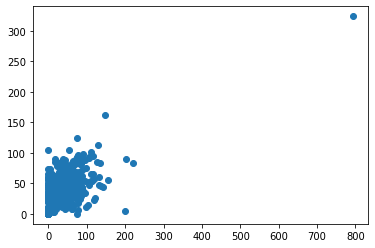

Model: RandomForestRegressor
Train score: 0.9014509818589701
Test Score: 0.4807200515150587




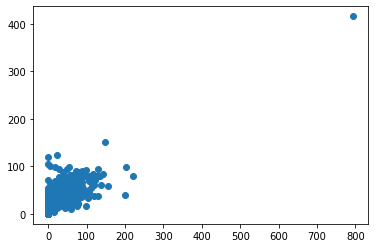

Model: ExtraTreesRegressor
Train score: 1.0
Test Score: 0.5429661511839186




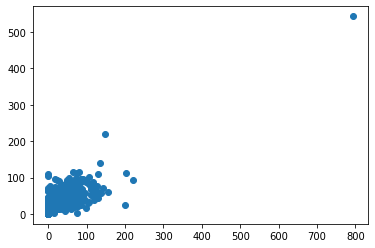

Model: AdaBoostRegressor
Train score: 0.2476078031602551
Test Score: 0.33820314536921003




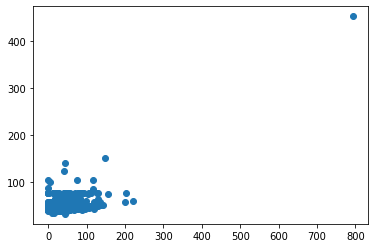

REGRESSIONS FOR hard_drugs_crime_per_10k
Model: LinearRegression
Train score: 0.07249808233783728
Test Score: 0.051228429413402




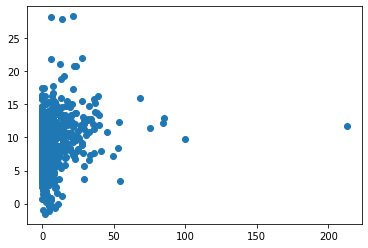

Model: KNeighborsRegressor
Train score: 0.36796155332592984
Test Score: -0.08734913368872665




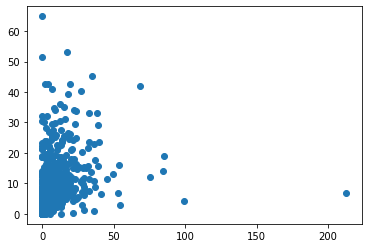

Model: RandomForestRegressor
Train score: 0.8656610860551475
Test Score: 0.17215546188545006




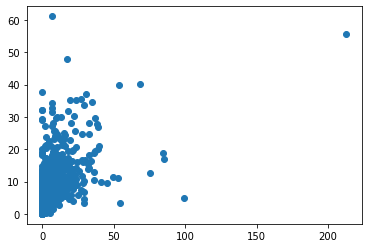

Model: ExtraTreesRegressor
Train score: 1.0
Test Score: 0.09399903698791179




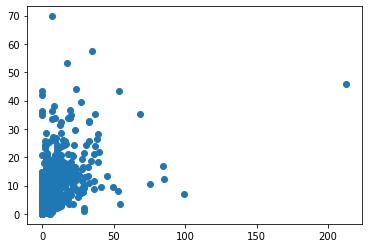

Model: AdaBoostRegressor
Train score: -1.4232109394748962
Test Score: -1.7185166290859017




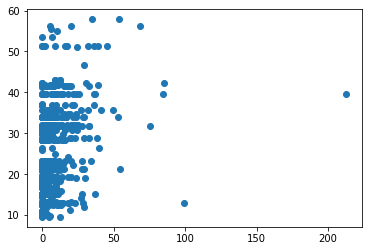

REGRESSIONS FOR soft_drugs_crime_per_10k
Model: LinearRegression
Train score: 0.02935384040010436
Test Score: 0.030436301793387854




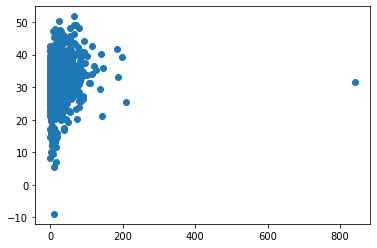

Model: KNeighborsRegressor
Train score: 0.30489464661711274
Test Score: 0.05773081626986232




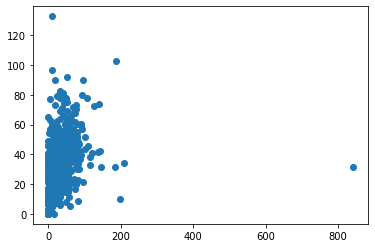

Model: RandomForestRegressor
Train score: 0.8559804980629733
Test Score: -0.05549865347569294




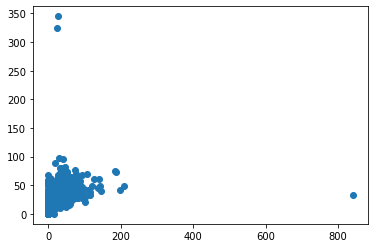

Model: ExtraTreesRegressor
Train score: 1.0
Test Score: 0.05957159944212154




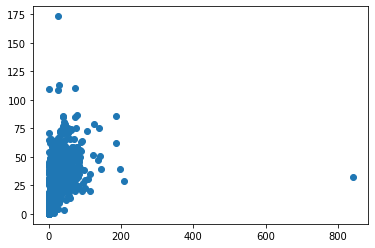

Model: AdaBoostRegressor
Train score: 0.2959005839527641
Test Score: -0.9387132705902299




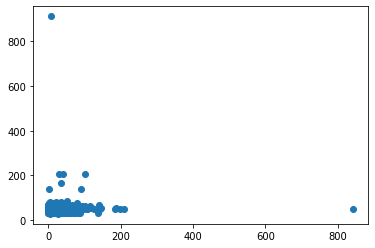

REGRESSIONS FOR commerce_crimes_per_10k
Model: LinearRegression
Train score: 0.06014711380131865
Test Score: 0.060423502392818795




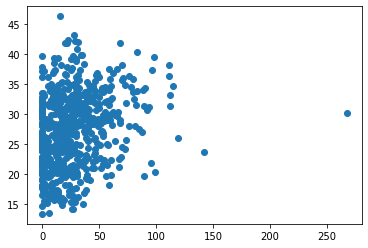

Model: KNeighborsRegressor
Train score: 0.4458033239443946
Test Score: 0.10704854199533997




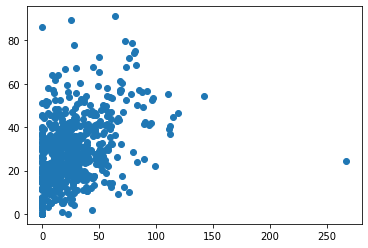

Model: RandomForestRegressor
Train score: 0.8974088319280633
Test Score: 0.2013039886689426




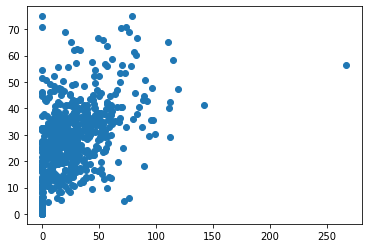

Model: ExtraTreesRegressor
Train score: 1.0
Test Score: 0.17105467517499817




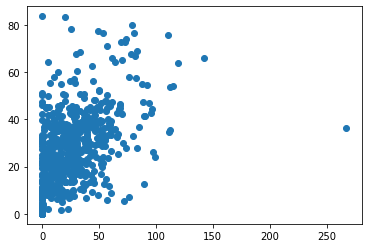

Model: AdaBoostRegressor
Train score: -0.08689681486498402
Test Score: -0.22954633270124591




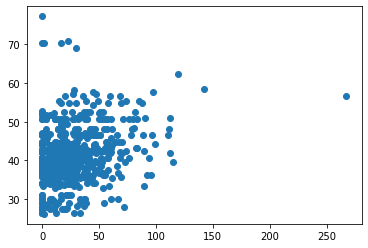

In [40]:
for y in y_vals:
    X = new_master_data.drop(["County", "State", "FIPS",'Unnamed: 0','crime_per_10k_x','crime_per_10k_y','violent_crime_per_10k', 'hard_drugs_crime_per_10k','soft_drugs_crime_per_10k', 'commerce_crimes_per_10k'],axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, new_master_data[y], test_size=0.2, random_state=42)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scale = scaler.transform(X_train)
    X_test_scale = scaler.transform(X_test)
    print(f'REGRESSIONS FOR {y}')
    test_model(LinearRegression())
    test_model(KNeighborsRegressor())
    test_model(RandomForestRegressor())
    test_model(ExtraTreesRegressor())
    test_model(AdaBoostRegressor())